<a href="https://colab.research.google.com/github/zypaoo/NCKH-DuyBao/blob/main/ndb_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install xgboost
!pip install imbalanced-learn
!pip install category_encoders

# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE

In [4]:
churn_data = pd.read_csv("/content/drive/MyDrive/Dataset_NCKH/Bảo Link2.csv")

In [5]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **EDA**


In [ ]:
obj_cols = {f for f in churn_data.columns if churn_data[f].dtype == 'object'}
print(obj_cols)

{'Churn', 'OnlineBackup', 'TechSupport', 'Partner', 'PhoneService', 'customerID', 'InternetService', 'DeviceProtection', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'StreamingTV', 'StreamingMovies', 'gender', 'OnlineSecurity', 'MultipleLines', 'Dependents'}


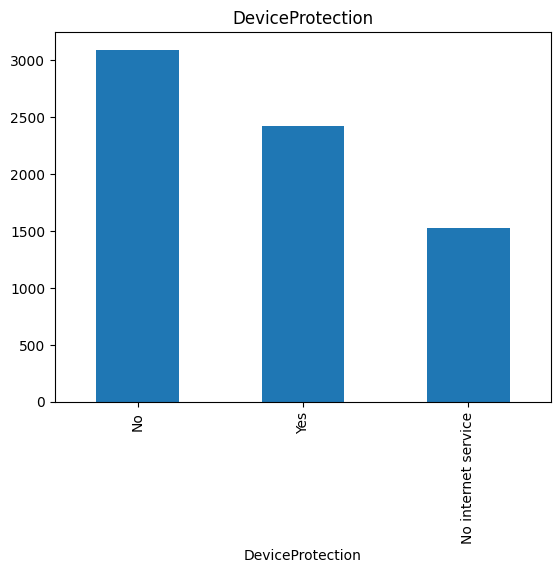

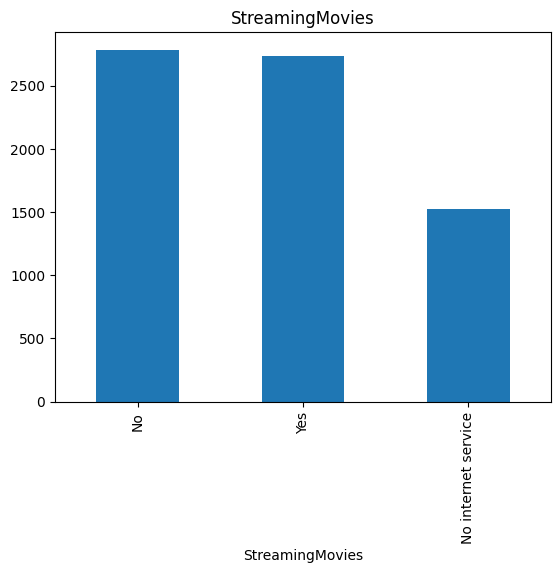

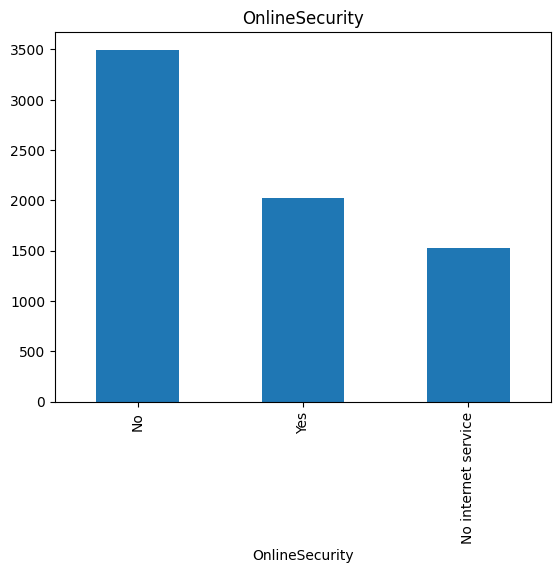

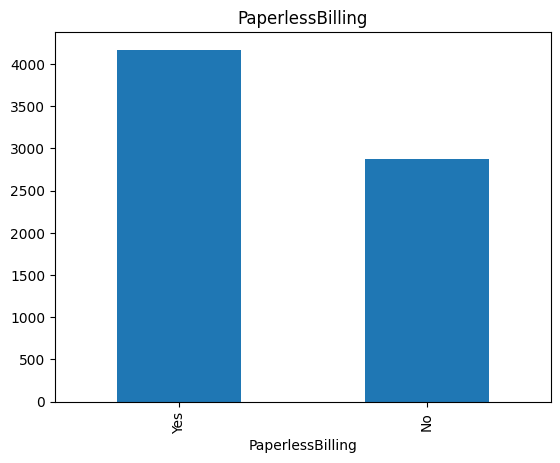

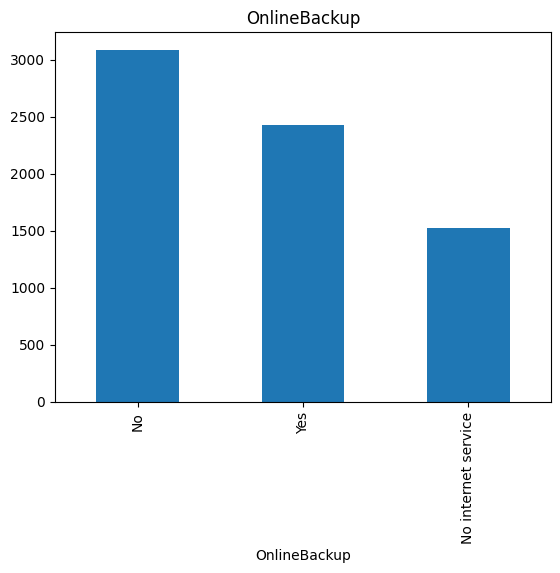

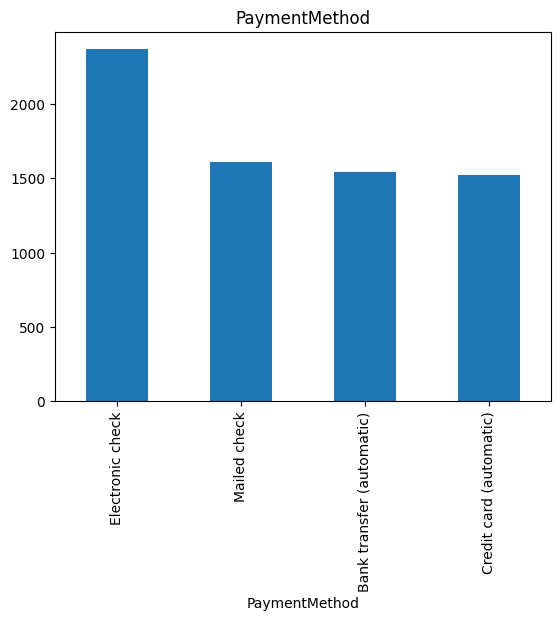

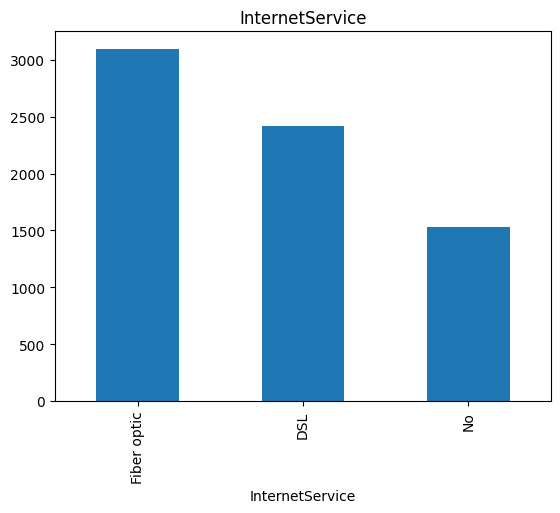

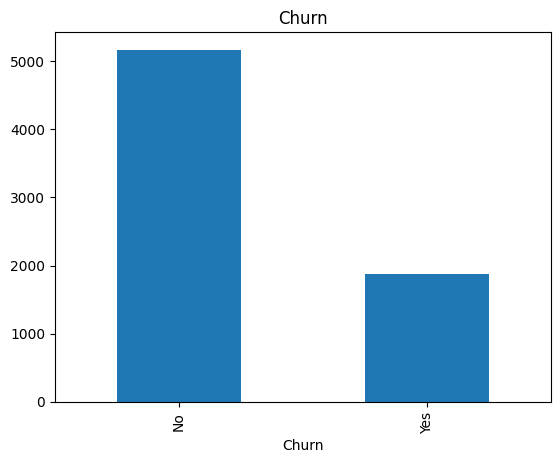

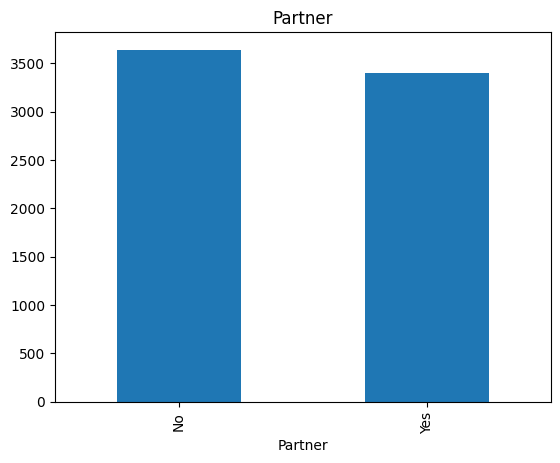

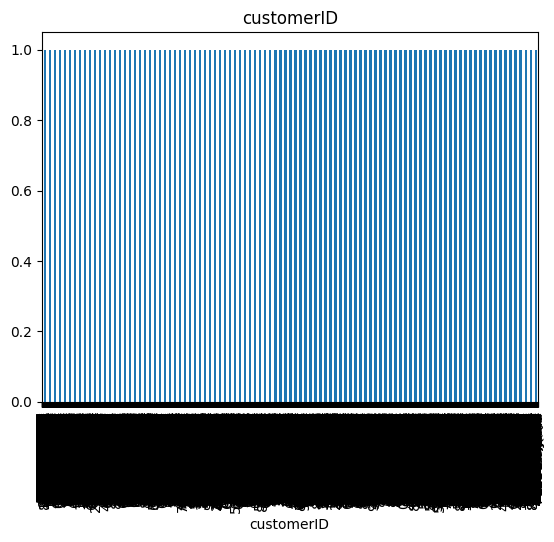

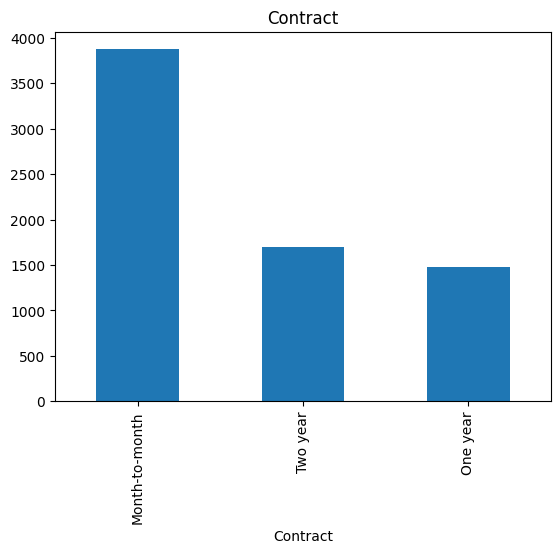

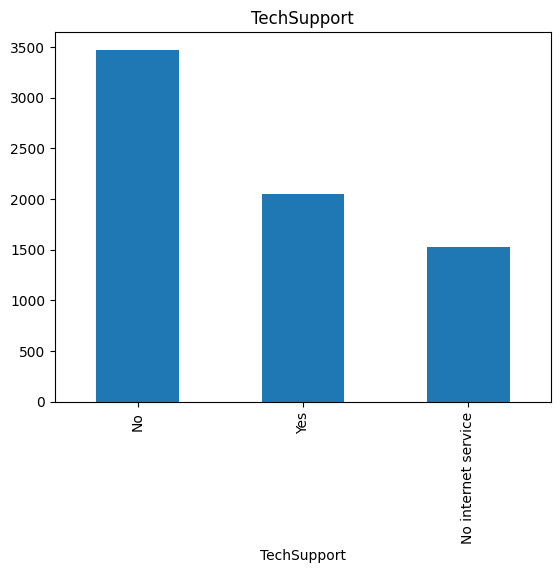

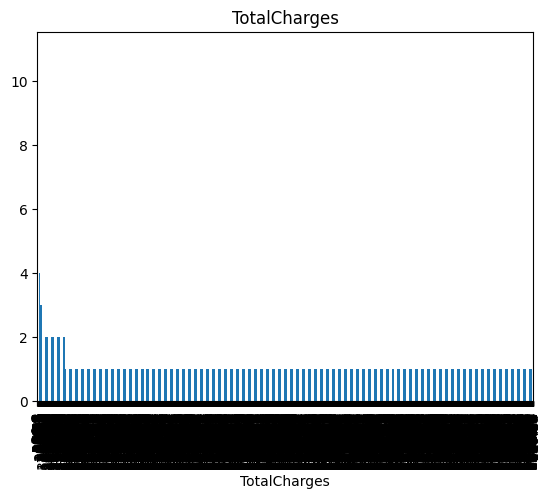

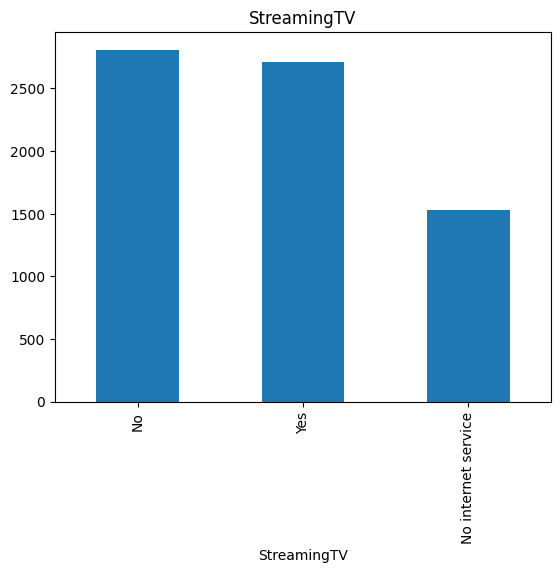

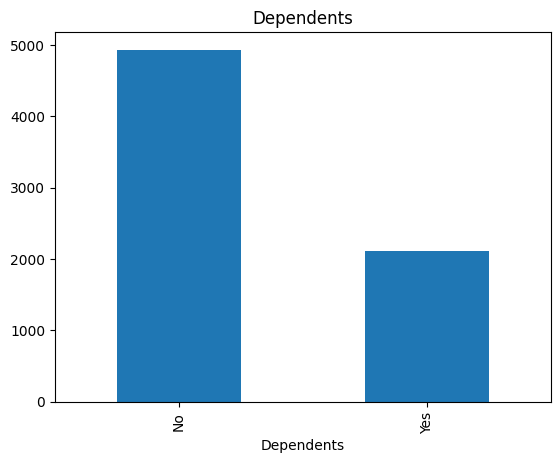

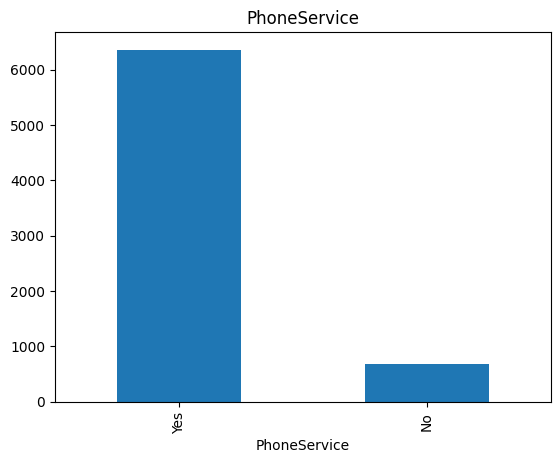

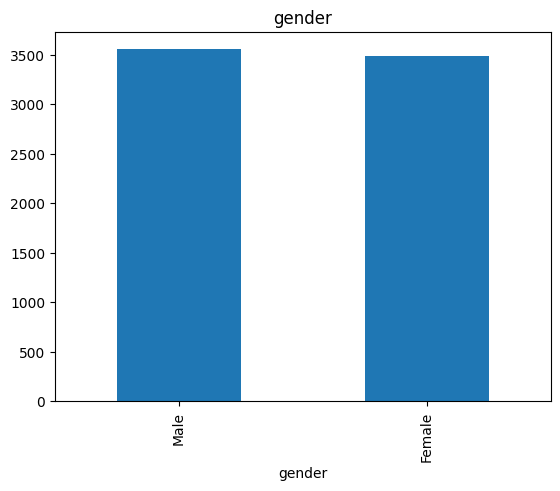

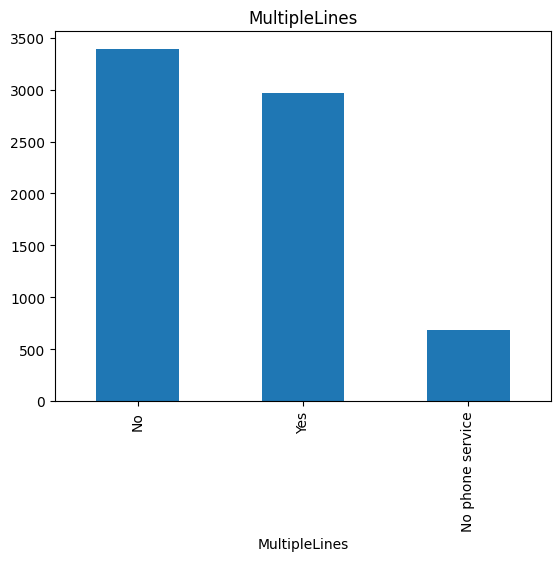

In [ ]:
for col in obj_cols:
  churn_data[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

In [ ]:
num_cols = {f for f in churn_data.columns if churn_data[f].dtype != 'object'}
print(num_cols)

{'SeniorCitizen', 'MonthlyCharges', 'tenure'}


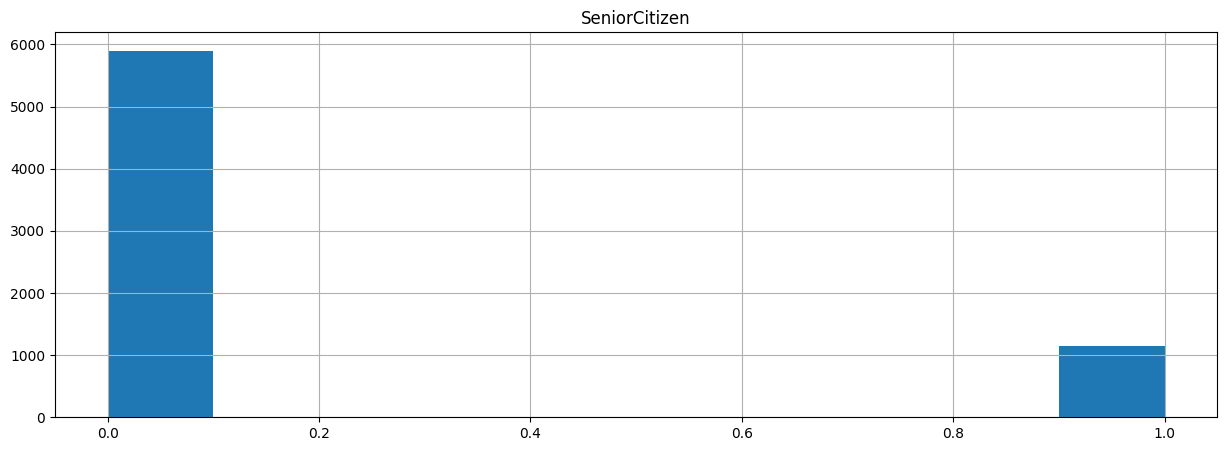

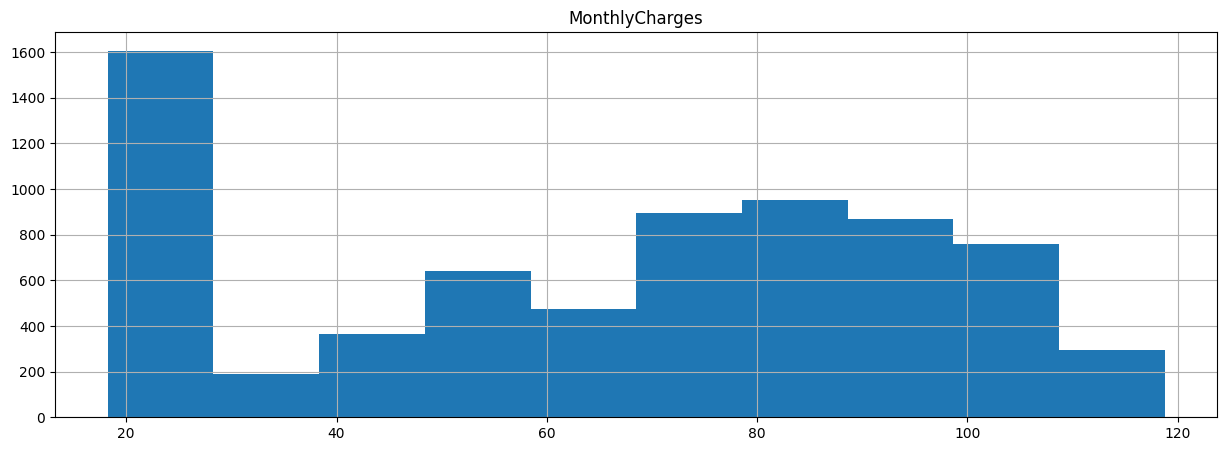

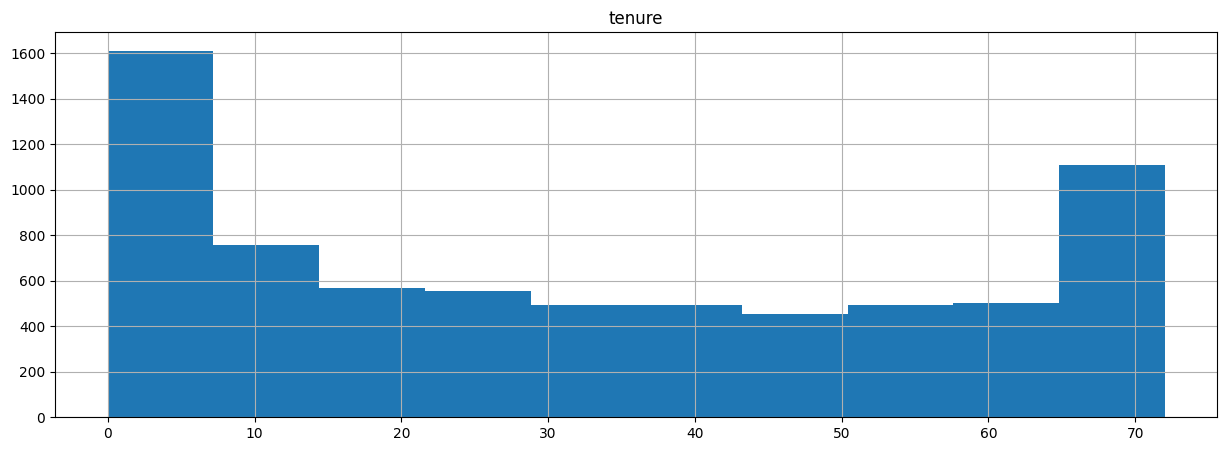

In [ ]:
for col in num_cols:
  churn_data[col].hist(figsize=(15,5))
  plt.title(col)
  plt.show()

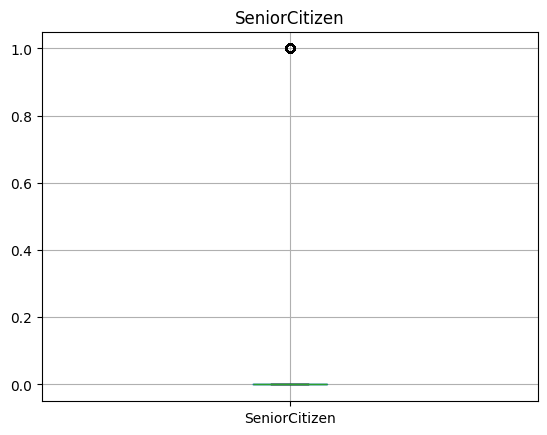

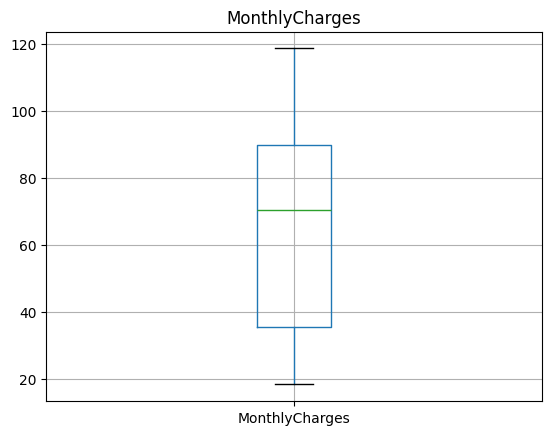

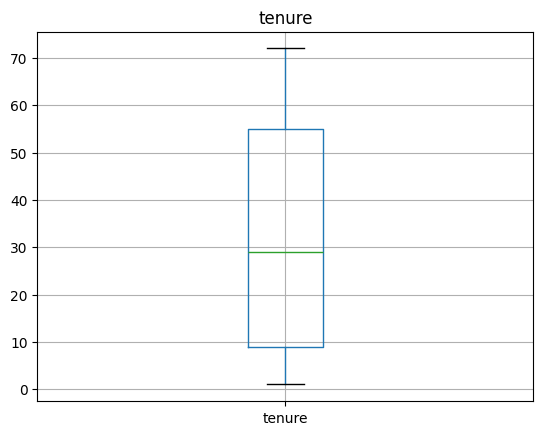

In [ ]:
for col in num_cols:
  churn_data.boxplot(column=[col])
  plt.title(col)
  plt.show()

In [8]:
dataset = churn_data.copy()

***DATA PROCESSING***

In [9]:
columns_to_drop = ['customerID']
dataset = dataset.drop(columns=columns_to_drop, errors='ignore')

In [10]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
dataset.shape

(7043, 20)

In [12]:
#Kiểm tra null
dataset.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [13]:
# Ép kiểu sang float
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', '0.0').astype(float)


In [14]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
def print_unique_col_values(dataset):
       for column in dataset:
            if dataset[column].dtypes=='object':
                print(f'{column}: {dataset[column].unique()}')

In [16]:
print_unique_col_values(dataset)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
#Gộp cái biến tương đồng ngữ nghĩa
dataset.replace('No internet service', 'No', inplace = True)
dataset.replace('No phone service', 'No', inplace = True)

In [18]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [19]:
multi_cat_cols = [
    'InternetService',     # DSL / Fiber optic / No
    'Contract',            # Month-to-month / One year / Two year
    'PaymentMethod'        # Electronic check / Mailed check / Bank transfer / Credit card
]


In [20]:
binary_map = {
    'Yes': 1, 'No': 0,
    'Female': 1, 'Male': 0
}

for col in binary_cols:
    dataset[col] = dataset[col].map(binary_map)

In [21]:
dataset


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [22]:
print_unique_col_values(dataset)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
dataset_ft= dataset.copy()

In [24]:
dataset_hash = pd.get_dummies(dataset,columns=['InternetService','Contract','PaymentMethod'], dtype=int)

In [25]:
dataset_hash

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [26]:
# View correlation
corr = dataset_hash.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.00,0.00,0.00,-0.01,-0.01,0.01,0.01,0.02,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.01,-0.01,0.01,-0.01,0.00,-0.01,0.00,0.02,-0.00,-0.00,-0.01
SeniorCitizen,0.00,1.00,0.02,-0.21,0.02,0.01,0.14,-0.04,0.07,0.06,-0.06,0.11,0.12,0.16,0.22,0.10,0.15,-0.11,0.26,-0.18,0.14,-0.05,-0.12,-0.02,-0.02,0.17,-0.15
Partner,0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.14,0.14,0.15,0.12,0.12,0.12,-0.01,0.10,0.32,-0.15,-0.00,0.00,0.00,-0.28,0.08,0.25,0.11,0.08,-0.08,-0.10
Dependents,-0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.08,0.02,0.01,0.06,-0.02,-0.04,-0.11,-0.11,0.06,-0.16,0.05,-0.17,0.14,-0.23,0.07,0.20,0.05,0.06,-0.15,0.06
tenure,-0.01,0.02,0.38,0.16,1.00,0.01,0.33,0.33,0.36,0.36,0.32,0.28,0.29,0.01,0.25,0.83,-0.35,0.01,0.02,-0.04,-0.65,0.20,0.56,0.24,0.23,-0.21,-0.23
PhoneService,0.01,0.01,0.02,-0.00,0.01,1.00,0.28,-0.09,-0.05,-0.07,-0.10,-0.02,-0.03,0.02,0.25,0.11,0.01,-0.45,0.29,0.17,-0.00,-0.00,0.00,0.01,-0.01,0.00,-0.00
MultipleLines,0.01,0.14,0.14,-0.02,0.33,0.28,1.00,0.10,0.20,0.20,0.10,0.26,0.26,0.16,0.49,0.47,0.04,-0.20,0.37,-0.21,-0.09,-0.00,0.11,0.08,0.06,0.08,-0.23
OnlineSecurity,0.02,-0.04,0.14,0.08,0.33,-0.09,0.10,1.00,0.28,0.28,0.35,0.18,0.19,-0.00,0.30,0.41,-0.17,0.32,-0.03,-0.33,-0.25,0.10,0.19,0.10,0.12,-0.11,-0.08
OnlineBackup,0.01,0.07,0.14,0.02,0.36,-0.05,0.20,0.28,1.00,0.30,0.29,0.28,0.27,0.13,0.44,0.51,-0.08,0.16,0.17,-0.38,-0.16,0.08,0.11,0.09,0.09,-0.00,-0.17
DeviceProtection,0.00,0.06,0.15,0.01,0.36,-0.07,0.20,0.28,0.30,1.00,0.33,0.39,0.40,0.10,0.48,0.52,-0.07,0.15,0.18,-0.38,-0.23,0.10,0.17,0.08,0.11,-0.00,-0.19


In [27]:
#Xem qua tương quan với biến Churn
corr_with_churn = corr['Churn'].apply(abs).sort_values(ascending=False)
print(corr_with_churn)


Churn                                      1.000000
Contract_Month-to-month                    0.405103
tenure                                     0.352229
InternetService_Fiber optic                0.308020
Contract_Two year                          0.302253
PaymentMethod_Electronic check             0.301919
InternetService_No                         0.227890
TotalCharges                               0.198324
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
Contract_One year                          0.177820
OnlineSecurity                             0.171226
TechSupport                                0.164674
Dependents                                 0.164221
SeniorCitizen                              0.150889
Partner                                    0.150448
PaymentMethod_Credit card (automatic)      0.134302
InternetService_DSL                        0.124214
PaymentMethod_Bank transfer (automatic)    0.117937
PaymentMetho

In [28]:
#Loại các biến có tương quan <0.05

low_corr_features = corr_with_churn[corr_with_churn < 0.05].index.tolist()
dataset_hash = dataset_hash.drop(columns=low_corr_features)
print("Các biến bị loại do tương quan |corr| < 0.05:")
print(low_corr_features)

Các biến bị loại do tương quan |corr| < 0.05:
['MultipleLines', 'PhoneService', 'gender']


In [29]:
dataset_hash

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,1,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,72,0,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [30]:
dataset_up1 = dataset_hash.copy()

In [31]:
dataset_up1

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,1,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,1,1,72,0,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [32]:
#Kiểm tra phân bổ dữ liệu
for col in dataset_up1.columns:
    unique_vals = dataset_up1[col].unique()
    if set(unique_vals) <= {0, 1}:
        ratio = dataset_up1[col].mean()
        print(f"{col}: {ratio:.2%} là 1 | {100 - ratio*100:.2f}% là 0")


SeniorCitizen: 16.21% là 1 | 83.79% là 0
Partner: 48.30% là 1 | 51.70% là 0
Dependents: 29.96% là 1 | 70.04% là 0
OnlineSecurity: 28.67% là 1 | 71.33% là 0
OnlineBackup: 34.49% là 1 | 65.51% là 0
DeviceProtection: 34.39% là 1 | 65.61% là 0
TechSupport: 29.02% là 1 | 70.98% là 0
StreamingTV: 38.44% là 1 | 61.56% là 0
StreamingMovies: 38.79% là 1 | 61.21% là 0
PaperlessBilling: 59.22% là 1 | 40.78% là 0
Churn: 26.54% là 1 | 73.46% là 0
InternetService_DSL: 34.37% là 1 | 65.63% là 0
InternetService_Fiber optic: 43.96% là 1 | 56.04% là 0
InternetService_No: 21.67% là 1 | 78.33% là 0
Contract_Month-to-month: 55.02% là 1 | 44.98% là 0
Contract_One year: 20.91% là 1 | 79.09% là 0
Contract_Two year: 24.07% là 1 | 75.93% là 0
PaymentMethod_Bank transfer (automatic): 21.92% là 1 | 78.08% là 0
PaymentMethod_Credit card (automatic): 21.61% là 1 | 78.39% là 0
PaymentMethod_Electronic check: 33.58% là 1 | 66.42% là 0
PaymentMethod_Mailed check: 22.89% là 1 | 77.11% là 0


#SMOTE AND SCALE

In [33]:
# SMOTE & Scale
X = dataset_up1.drop(["Churn"],axis=1)
y = dataset_up1['Churn']
# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)


In [34]:
from collections import Counter
print("Before:", Counter(y_train))
print("After:", Counter(y_train_resample))

Before: Counter({0: 4138, 1: 1496})
After: Counter({0: 4138, 1: 4138})


In [35]:
cols_to_scale = [col for col in X_train_resample.columns
                 if X_train_resample[col].dtype in ['int64', 'float64'] and X_train_resample[col].nunique() > 2]

In [36]:
cols_to_scale

['tenure', 'MonthlyCharges', 'TotalCharges']

In [37]:
scaler = MinMaxScaler()
scaler.fit(X_train_resample[cols_to_scale])
X_train_resample[cols_to_scale] = scaler.transform(X_train_resample[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [38]:
X_train_resample

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0.291667,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0.750000,0,1,0,0,1,1,...,0,1,0,0,0,1,1,0,0,0
2,0,1,0,0.013889,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,0,0,0.055556,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,1,0.000000,1,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,0,1,1,0.388889,1,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
8272,0,1,0,0.805556,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
8273,0,1,1,0.916667,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
8274,0,0,0,0.041667,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


TRAIN

In [39]:
pip install pytorch-tabnet

In [40]:
from pytorch_tabnet.tab_model import TabNetClassifier

X_train_resample = X_train_resample.astype({col: int for col in X_train_resample.select_dtypes('bool').columns})
X_train, X_test, y_train, y_test = train_test_split(X_train_resample, y_train_resample, test_size=0.2, random_state=42)


In [41]:
import torch
model = TabNetClassifier(
    n_d=32, n_a=32,         # Tăng số chiều đại diện
    n_steps=5,              # Tăng số bước attention
    gamma=1.5,
    lambda_sparse=1e-8,
    optimizer_params=dict(lr=1e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [42]:
X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})

model.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_test.values, y_test.values)],
    eval_name=['valid'],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,
    batch_size=1024
)



# Dự đoán và đánh giá
preds = model.predict(X_test.values)
print(classification_report(y_test, preds))

epoch 0  | loss: 1.54403 | valid_accuracy: 0.5006  |  0:00:01s
epoch 1  | loss: 0.79787 | valid_accuracy: 0.68116 |  0:00:02s
epoch 2  | loss: 0.63312 | valid_accuracy: 0.60688 |  0:00:02s
epoch 3  | loss: 0.5526  | valid_accuracy: 0.60205 |  0:00:03s
epoch 4  | loss: 0.53758 | valid_accuracy: 0.60326 |  0:00:04s
epoch 5  | loss: 0.51208 | valid_accuracy: 0.59843 |  0:00:05s
epoch 6  | loss: 0.49288 | valid_accuracy: 0.71075 |  0:00:07s
epoch 7  | loss: 0.50363 | valid_accuracy: 0.73551 |  0:00:08s
epoch 8  | loss: 0.49029 | valid_accuracy: 0.73853 |  0:00:09s
epoch 9  | loss: 0.48559 | valid_accuracy: 0.74577 |  0:00:10s
epoch 10 | loss: 0.47574 | valid_accuracy: 0.75845 |  0:00:11s
epoch 11 | loss: 0.47789 | valid_accuracy: 0.77053 |  0:00:12s
epoch 12 | loss: 0.46358 | valid_accuracy: 0.75725 |  0:00:13s
epoch 13 | loss: 0.46527 | valid_accuracy: 0.77355 |  0:00:14s
epoch 14 | loss: 0.46488 | valid_accuracy: 0.77657 |  0:00:15s
epoch 15 | loss: 0.45537 | valid_accuracy: 0.75121 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       830
           1       0.80      0.80      0.80       826

    accuracy                           0.80      1656
   macro avg       0.80      0.80      0.80      1656
weighted avg       0.80      0.80      0.80      1656



In [45]:
y_proba = model.predict_proba(X_test.values)[:, 1]

# Áp dụng ngưỡng tùy chỉnh
threshold = 0.5
y_pred1 = (y_proba >= threshold).astype(int)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy  = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall    = recall_score(y_test, y_pred1)
f1        = f1_score(y_test, y_pred1)
roc_auc   = roc_auc_score(y_test, y_pred1)

# Tạo bảng kết quả
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Score' : [accuracy, precision, recall, f1, roc_auc]
})

print(results_df)

      Metric     Score
0   Accuracy  0.802536
1  Precision  0.802424
2     Recall  0.801453
3   F1-Score  0.801938
4    ROC AUC  0.802534


In [47]:
len(X_train.columns)

23

In [48]:
import tensorflow as tf
from tensorflow import keras


model2 = keras.Sequential([
    keras.layers.Dense(23, input_dim=23, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4995 - loss: 0.7113
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5363 - loss: 0.6844
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5734 - loss: 0.6565
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6045 - loss: 0.6340
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6362 - loss: 0.6061
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6603 - loss: 0.6112
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6744 - loss: 0.5848
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6948 - loss: 0.5858
Epoch 9/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7099 - loss: 0.5731
Epoch 10/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7243 - loss: 0.5614
Epoch 11/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7339 - loss: 0.5565
Epoch 12/100
207/207 ━━━━━━━━━━━━━━━━━━━━

In [49]:
# Dự đoán và đánh giá
preds2 = model2.predict(X_test)


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [54]:
y_pred = []
for element in preds2:
    if element > 0.4:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [55]:

accuracy2  = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2    = recall_score(y_test, y_pred)
f12        = f1_score(y_test, y_pred)
roc_auc2   = roc_auc_score(y_test, y_pred)

# Tạo bảng kết quả
results_df2 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Score' : [accuracy2, precision2, recall2, f12, roc_auc2]
})

print(results_df2)

      Metric     Score
0   Accuracy  0.846014
1  Precision  0.838671
2     Recall  0.855932
3   F1-Score  0.847214
4    ROC AUC  0.846038


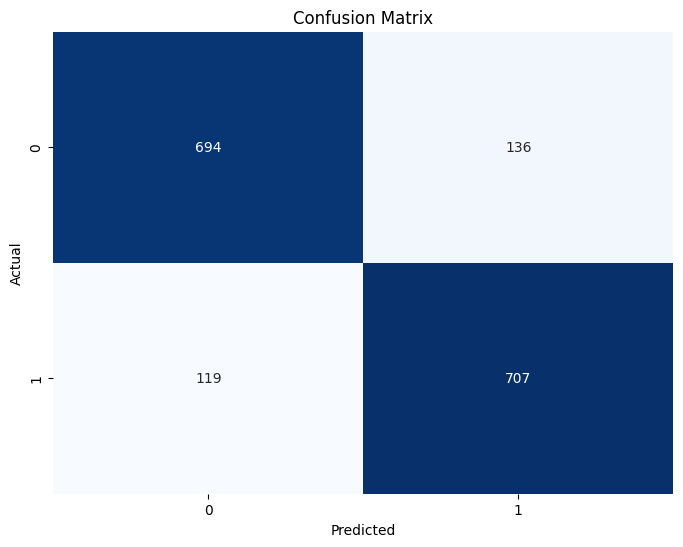

In [56]:
cm1 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

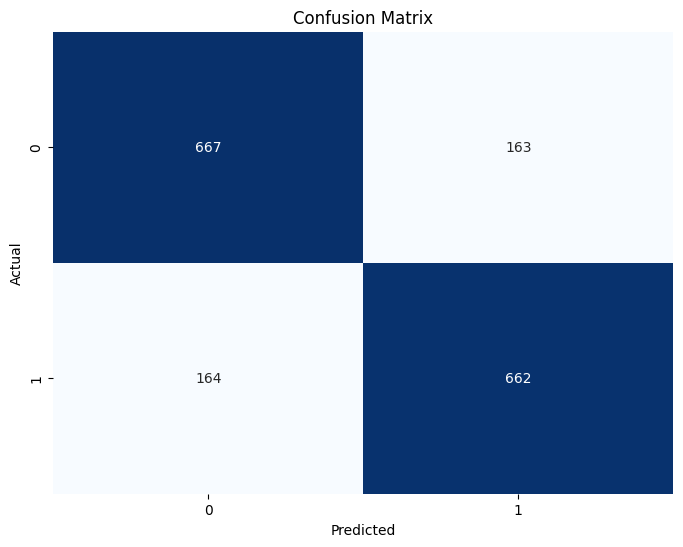

In [57]:
cm2 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

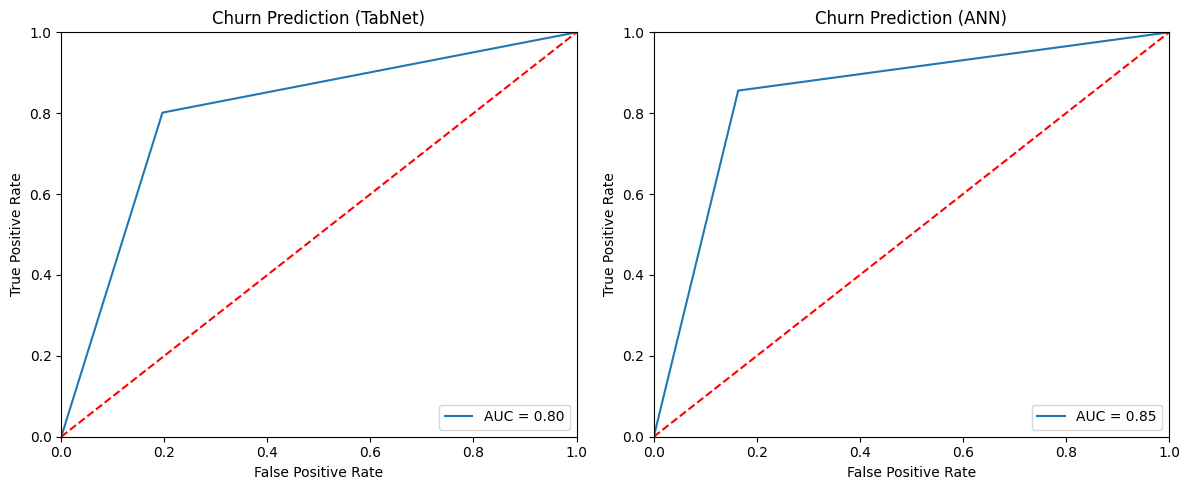

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC cho TabNet
fpr1, tpr1, threshold1 = roc_curve(y_test, preds)      # preds là xác suất từ TabNet
roc_auc1 = auc(fpr1, tpr1)

# ROC cho ANN
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred)      # y_pred là xác suất từ ANN
roc_auc2 = auc(fpr2, tpr2)

# Tạo figure với 2 subplot ngang hàng
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 hàng, 2 cột

# Plot TabNet ROC
axs[0].plot(fpr1, tpr1, label='AUC = %0.2f' % roc_auc1)
axs[0].plot([0, 1], [0, 1], 'r--')
axs[0].set_title('Churn Prediction (TabNet)')
axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend(loc='lower right')

# Plot ANN ROC
axs[1].plot(fpr2, tpr2, label='AUC = %0.2f' % roc_auc2)
axs[1].plot([0, 1], [0, 1], 'r--')
axs[1].set_title('Churn Prediction (ANN)')
axs[1].set_xlim([0, 1])
axs[1].set_ylim([0, 1])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')

# Hiển thị
plt.tight_layout()
plt.show()


In [60]:
dataset_ft

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [61]:
#Loại các biến có tương quan <0.05
dataset_ft = dataset_ft.drop(columns=['MultipleLines', 'PhoneService', 'gender'])


In [62]:
dataset_ft

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [63]:
NUMERIC_FEATURES = ['tenure', 'MonthlyCharges', 'TotalCharges']
CATEGORICAL_FEATURES = [
    'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen'
]

FEATURES = NUMERIC_FEATURES + CATEGORICAL_FEATURES
LABEL = 'Churn'

In [64]:
# Áp dụng LabelEncoder
from sklearn.preprocessing import LabelEncoder

multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']

for col in multi_cat_cols:
    le = LabelEncoder()
    dataset_ft[col] = le.fit_transform(dataset_ft[col].astype(str))

In [65]:
dataset_ft

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,1,1,72,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,1,1,11,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [66]:
dataset_ft[CATEGORICAL_FEATURES] = dataset_ft[CATEGORICAL_FEATURES].astype(str)

dataset_ft[NUMERIC_FEATURES] = dataset_ft[NUMERIC_FEATURES].astype(float)

X_train_ft, X_val_ft = train_test_split(dataset_ft, test_size=0.2)
# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_resampled, y_resampled = sm.fit_resample(X_train_ft[FEATURES],X_train_ft[LABEL])

In [67]:
X_train_ft_sm = pd.concat([pd.DataFrame(X_resampled, columns=X_train_ft[FEATURES].columns),
                           pd.Series(y_resampled, name='Churn')], axis=1)

In [68]:
X_train_ft_sm

,tenure,MonthlyCharges,TotalCharges,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,Churn
0,47.000000,86.950000,4138.900000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
1,1.000000,91.700000,91.700000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1
2,32.000000,98.850000,3089.600000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0
3,46.000000,64.200000,3009.500000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0
4,24.000000,20.100000,533.900000,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,1.000000,74.780168,74.780168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.599162,1
8254,2.000000,75.369662,146.921753,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.087787,0.0,0.0,0.087787,1.087787,0.0,1
8255,1.000000,43.366582,43.366582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.373266,0.0,1
8256,14.271966,83.166739,1219.270295,0.364017,0.364017,1.0,0.0,0.635983,0.0,0.0,0.364017,0.364017,0.0,0.635983,2.0,0.635983,1


In [69]:
X_train_ft, X_val_ft = train_test_split(X_train_ft_sm, test_size=0.2)


In [70]:
sc = MinMaxScaler()
X_train_ft.loc[:, NUMERIC_FEATURES] = sc.fit_transform(X_train_ft[NUMERIC_FEATURES])
X_val_ft.loc[:, NUMERIC_FEATURES] = sc.transform(X_val_ft[NUMERIC_FEATURES])


In [71]:
X_train_ft

,tenure,MonthlyCharges,TotalCharges,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,Churn
5848,0.692336,0.461264,0.363381,0.356738,0.0,0.0,1.0,0.643262,1.0,1.0,0.0,1.0,1.356738,0.0,1.356738,0.0,1
5763,0.040799,0.253169,0.014173,0.0,0.0,0.0,0.0,0.062457,0.0,0.0,0.0,0.0,0.0,1.0,2.062457,0.0,1
6782,0.081076,0.582022,0.050584,0.837491,0.0,1.0,0.0,0.0,0.0,0.0,0.162509,0.0,0.0,1.0,1.837491,0.162509,1
7418,0.566887,0.653756,0.377554,1.0,0.184109,1.0,0.815891,0.0,1.0,0.184109,0.0,0.0,0.0,1.0,0.368218,0.815891,1
6265,0.264793,0.810895,0.222376,0.0,0.0,1.0,0.0,0.978305,0.0,0.021695,1.0,0.978305,0.0,1.0,1.956609,0.021695,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,0.375000,0.631343,0.254761,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0
7029,0.463023,0.699432,0.330793,1.0,0.834413,1.0,0.0,0.0,0.834413,0.0,1.0,0.165587,0.0,0.165587,1.834413,0.0,1
4608,1.000000,0.622886,0.659480,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0
7876,0.044006,0.173007,0.012706,0.0,0.0,0.0,0.0,0.831555,0.168445,0.831555,0.0,0.0,0.0,1.0,2.831555,0.0,1


In [72]:
pip install tabtransformertf

In [73]:
from tabtransformertf.models.fttransformer import FTTransformerEncoder, FTTransformer
from tabtransformertf.utils.preprocessing import build_categorical_prep
import tensorflow as tf
import numpy as np

# Modified df_to_dataset function
def df_to_dataset(dataframe, target, shuffle=True, batch_size=32):
    labels = dataframe[target].to_numpy()
    df = dataframe.copy()
    del df[target]

    # Convert DataFrame to a dictionary of NumPy arrays
    dataset = {key: value.to_numpy()[:, np.newaxis] for key, value in df.items()}


    dataset = tf.data.Dataset.from_tensor_slices((dataset, labels))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(dataframe))

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

In [74]:
X_train_ft[CATEGORICAL_FEATURES] = X_train_ft[CATEGORICAL_FEATURES].astype(str)

X_train_ft[NUMERIC_FEATURES] = X_train_ft[NUMERIC_FEATURES].astype(float)
X_val_ft[CATEGORICAL_FEATURES] = X_val_ft[CATEGORICAL_FEATURES].astype(str)

X_val_ft[NUMERIC_FEATURES] = X_val_ft[NUMERIC_FEATURES].astype(float)

In [75]:
train_dataset = df_to_dataset(X_train_ft[FEATURES + [LABEL]], LABEL)
val_dataset = df_to_dataset(X_val_ft[FEATURES + [LABEL]], LABEL, shuffle=False)

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

ft_linear_encoder = FTTransformerEncoder(
    numerical_features = NUMERIC_FEATURES,
    categorical_features = CATEGORICAL_FEATURES,
    numerical_data = X_train_ft[NUMERIC_FEATURES].values,
    categorical_data = X_train_ft[CATEGORICAL_FEATURES].values,
    y = None,
    numerical_embedding_type='linear',
    embedding_dim=16,
    depth=3,
    heads=6,
    attn_dropout=0.2,
    ff_dropout=0.2,
    explainable=True
)

# Pass the encoder to the model
ft_linear_transformer = FTTransformer(
    encoder=ft_linear_encoder,
    out_dim=1,
    out_activation='sigmoid',
)

LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
NUM_EPOCHS = 200

# Changed from tfa.optimizers.AdamW to tf.keras.optimizers.Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

ft_linear_transformer.compile(
    optimizer = optimizer,
    loss = {"output": tf.keras.losses.BinaryCrossentropy(), "importances": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR')], "importances": None},
)

early = EarlyStopping(monitor="val_output_loss", mode="min", patience=10, restore_best_weights=True)
callback_list = [early]

ft_linear_history = ft_linear_transformer.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=val_dataset,
    callbacks=callback_list
)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'ft_transformer_encoder_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


207/207 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - loss: 0.4580 - val_loss: 0.3359
Epoch 2/200
  5/207 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3668

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_output_loss` which is not available. Available metrics are: loss,val_loss
  current = self.get_monitor_value(logs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3341 - val_loss: 0.3198
Epoch 3/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3144 - val_loss: 0.3161
Epoch 4/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3106 - val_loss: 0.3410
Epoch 5/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.3036 - val_loss: 0.3733
Epoch 6/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.3147 - val_loss: 0.3514
Epoch 7/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.3067 - val_loss: 0.3447
Epoch 8/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.3117 - val_loss: 0.3746
Epoch 9/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2938 - val_loss: 0.3798
Epoch 10/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.3017 - val_loss: 0.4033
Epoch 11/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.3132 - val_loss: 0.4609
Epoch 12/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.3014 - val_loss: 0.4142
Epoch 13/200
207/207 ━━━━━━━━━━━━━━━━━━━

In [79]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, f1_score, recall_score

from sklearn.metrics import (
    roc_auc_score, average_precision_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix
)
linear_test_preds = ft_linear_transformer.predict(val_dataset)

# Lấy ground truth và xác suất dự đoán
y_true = X_val_ft[LABEL]
y_prob = linear_test_preds['output'].ravel()
threshold = 0.29
y_pred3 = (y_prob > threshold).astype(int)

print("FT-Transformer with Linear Numerical Embedding")
print("Threshold =", threshold)
print("ROC AUC:", np.round(roc_auc_score(y_true, y_prob), 4))
print("Accuracy:", np.round(accuracy_score(y_true, y_pred3), 4))
print("Precision:", np.round(precision_score(y_true, y_pred3), 4))
print("Recall:", np.round(recall_score(y_true, y_pred3), 4))
print("F1 Score:", np.round(f1_score(y_true, y_pred3), 4))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred3))


52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step
FT-Transformer with Linear Numerical Embedding
Threshold = 0.29
ROC AUC: 0.8922
Accuracy: 0.8136
Precision: 0.7837
Recall: 0.8687
F1 Score: 0.824
Confusion Matrix:
 [[623 199]
 [109 721]]


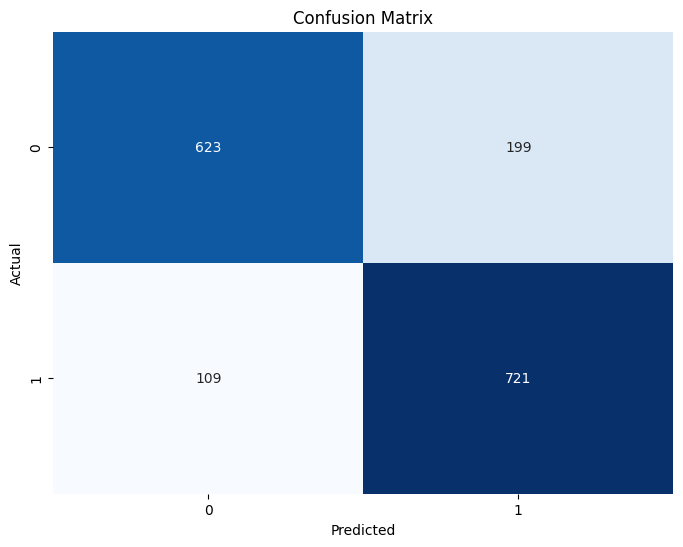

In [80]:
cm3 = confusion_matrix(y_true, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()